# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los datos que creo serán útiles para determinar el precio de una propiedad son los siguientes:

* 1) La zona donde se encuentra ubicada la propiedad: No todas las zonas cotizan igual. Una variable útil para trabajar este punto podría ser la latitud y longitud de la propiedad.
* 2) El acceso que tiene la propiedad: Tiene que ver con la zona y donde esta ubicada (1)
* 3) Que tipo de propiedad es: Una casa, un depto etc. El campo "Tipo de propiedad" sería útil.
* 4) El tamaño de la propiedad en m2 cubiertos y m2 totales: Datos de superfice pueden ser muy utiles.
* 5) La antiguedad y su condición edilicia.

***NOTA IMPORTANTE:*** Para entender que voy haciendo a lo largo del código, leer los comentarios con " # " o " ## " en color verde.

In [1]:
## Monto mi drive para acceder al data set de properati que previamente guarde 
# en una carpeta de drive.
## Para correr el codigo tomando la DB desde una dirección de pc, comentar el la
# parte de "drive.mount" y descomentar las siguietnes lineas pegar la dirección en la variable "direccion"
# comentando la linea que esta luego del punto 1) que sigue debajo del comentario: # Cargo el data set:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
# Importo las librería que voy a urilizar para desarrollar el proyecto:
# Nota: Estan casi todas. En puntos siguientes las vuelvo a importar para no
# tener que volver arriba de todo.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [4]:
# Cargo el data set: Cargo la data de mi drive que monte previamente, utilizando 
data  = pd.read_csv('/content/drive/MyDrive/Curso Acamica/Sprint 1/DS_Proyecto_01_Datos_Properati.csv')

## Si se usa la data desde la pc, comentar lo de arriba y descomentar lo de abajo
# para utilizar:

# direccion = 
# data  = pd.read_csv(direccion)

In [6]:
## Primer análisis exploratorio de datos:

# Me fijo cuantas columnas y filas tiene:

n_filas = data.shape[0]       # shape[0] me indica el numero de filas
n_columnas = data.shape[1]    # shape[1] me indica el numero de columnas

print('Cantidad de filas ', n_filas)
print('Cantidad de columnas ', n_columnas)

# Imprimo lasprimeras 5 instancias: Aca la idea es ver que "pinta" tiene mi data
# y como se llaman las columnas que voy a ir usando a lo largo del proyecto.

print(' ')
data.head()  # con head() me devuelve insatncias 0 1 2 3 5 ( 5 primeras )

Cantidad de filas  146660
Cantidad de columnas  19
 


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [8]:
# Nombres de las clumnas:
nombre_columnas = data.columns # Me armo un vector con los nombres de las columnas

print('---------------------------------------------------------------------------------------------------------')
print('Nombres de las columnas ',nombre_columnas)  # Imprimo los nombres para mirar como los indica.
print('---------------------------------------------------------------------------------------------------------')

bool_mat = data.isna() # Crea data frame de booleans donde un true es un blank y un false es que existe un dato.

#Ahora voy recorriendo con un for loop el nombre de cada columna y sumo todos los faltantes en cada columna. 

for nombre in nombre_columnas: # Voy iterando el nombre del vector nombre_columnas con un for.
    print('Falantes en: ',nombre,': ',sum(bool_mat[nombre]),' valores.')

---------------------------------------------------------------------------------------------------------
Nombres de las columnas  Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
---------------------------------------------------------------------------------------------------------
Falantes en:  start_date :  0  valores.
Falantes en:  end_date :  0  valores.
Falantes en:  created_on :  0  valores.
Falantes en:  lat :  9925  valores.
Falantes en:  lon :  9959  valores.
Falantes en:  l1 :  0  valores.
Falantes en:  l2 :  0  valores.
Falantes en:  l3 :  0  valores.
Falantes en:  rooms :  0  valores.
Falantes en:  bedrooms :  0  valores.
Falantes en:  bathrooms :  5957  valores.
Falantes en:  surface_total :  20527  valores.
Falantes en:  surface_covered :  21614  va

Los campos con mayor cantidad de valores faltantes son:
* surface_covered (superficie cubierta):21614 valores faltantes. Esto representa el 14.73% de valores faltantes en el data set para este campo. Nada mal, pero el equipo de properati podría mejorar en este punto a la hora de adquirir datos.
* surface_total (superficie total): 20527 valores faltantes. Esto representa el 13.9% de valores faltantes en el data set para este campo. Nada mal, pero el equipo de properati podría mejorar en este punto a la hora de adquirir datos.
* lat (latitud): 9925 valores faltantes. Esto representa el 6.76% de la data para este campo. (9925/146660)*100. No esta nada mal. Hay una buena cantidad de datos para trabajar. Después hay que ver si la restante es coherente o hay algun/os valores outliers.
* lon (longitud): 9959 valores faltanes. Esto representa el 6.79% de la data para este campo. (9959/146660)*100. No esta nada mal. Hay una buena cantidad de datos para trabajar. Después hay que ver si la restante es coherente o hay algun/os valores outliers.
* bathrooms (cantidad de baños): 5957 datos faltantes. Esto representa el 4.06% de los datos faltantes para este campo. Muy bien!

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

----------------------------------------------------------------------------------
Existen  10  tipos de propiedades diferentes en el data set: 
----------------------------------------------------------------------------------


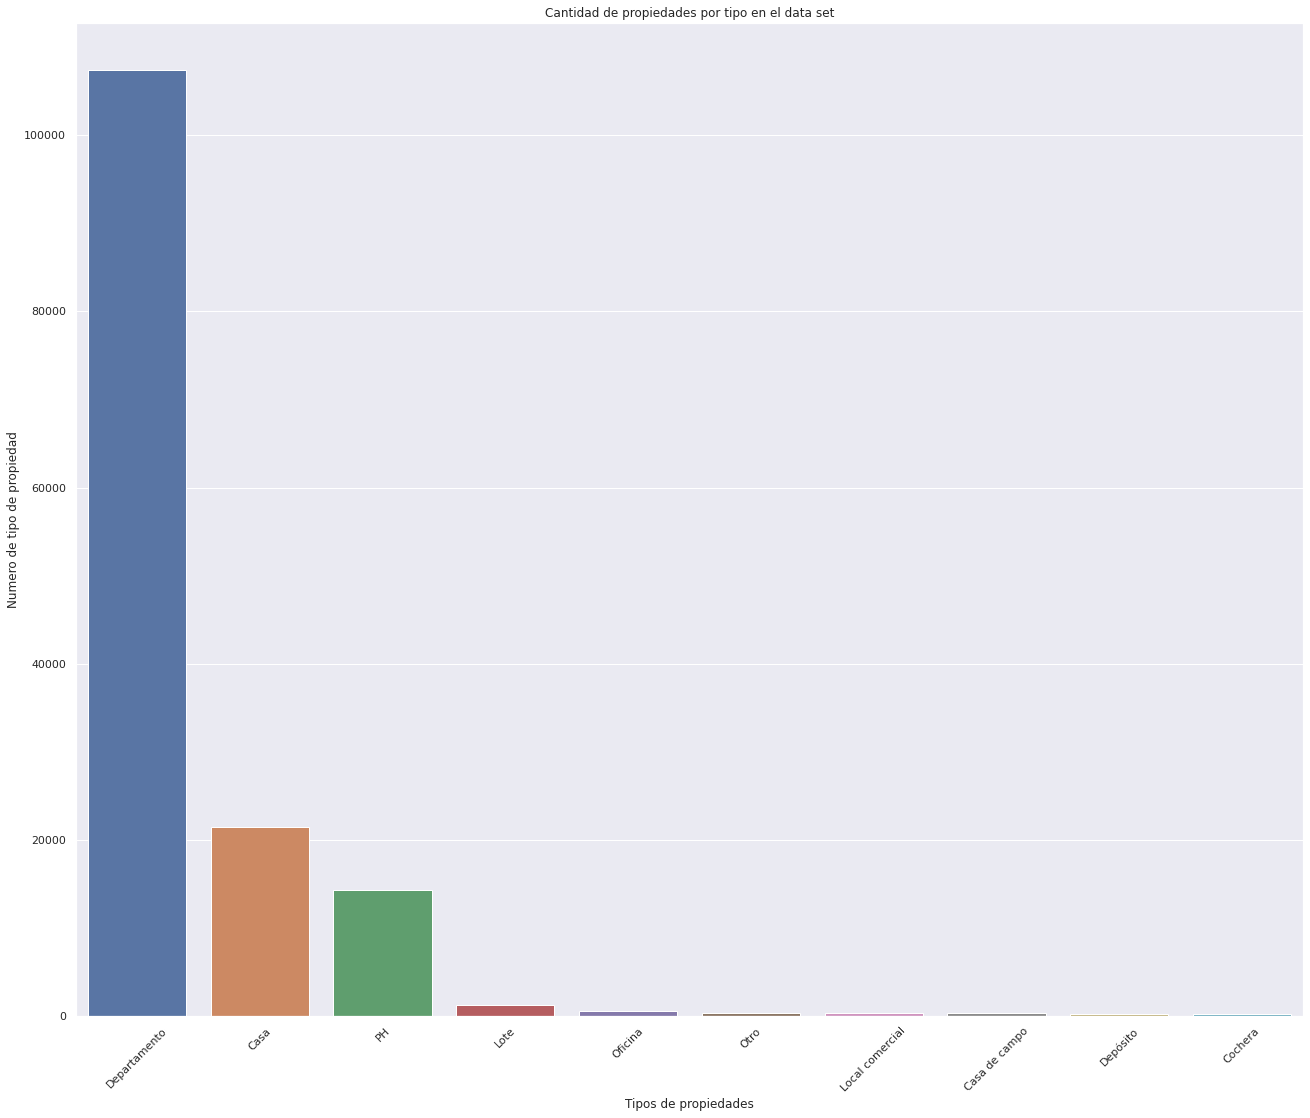

In [9]:
# Muestro la cantidad con un grafico de barras: property_type es una variable categorica y la voy a usar para mostrar la cantidad por tipo de propiedad.

print('----------------------------------------------------------------------------------')
print('Existen ',len(pd.unique(data.property_type)),' tipos de propiedades diferentes en el data set: ') # Uso el unique de pandas.
print('----------------------------------------------------------------------------------')

## Grafico en un grafico de barras ordenado de mayor a menor:
sns.set(rc={'figure.figsize':(12+10,8.27+10)})
sns.countplot(x = "property_type", data = data, order = data["property_type"].value_counts().index)
plt.xticks(rotation = 45)       # Roto las etiquetas para que se vea.
plt.title('Cantidad de propiedades por tipo en el data set')
plt.xlabel('Tipos de propiedades')
plt.ylabel('Numero de tipo de propiedad')

plt.show()

## Respueta: Los mayoritarios son:
# a) Departamento
# b) Casa.
# c) PH.
# No hay mucha cochera.

## Si pensamos en un paretto el 80% de las propiedades listadas en el data set corresponden al a b c de los tipos mencionados anterioremente:
# Departamento, Casa y PH.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

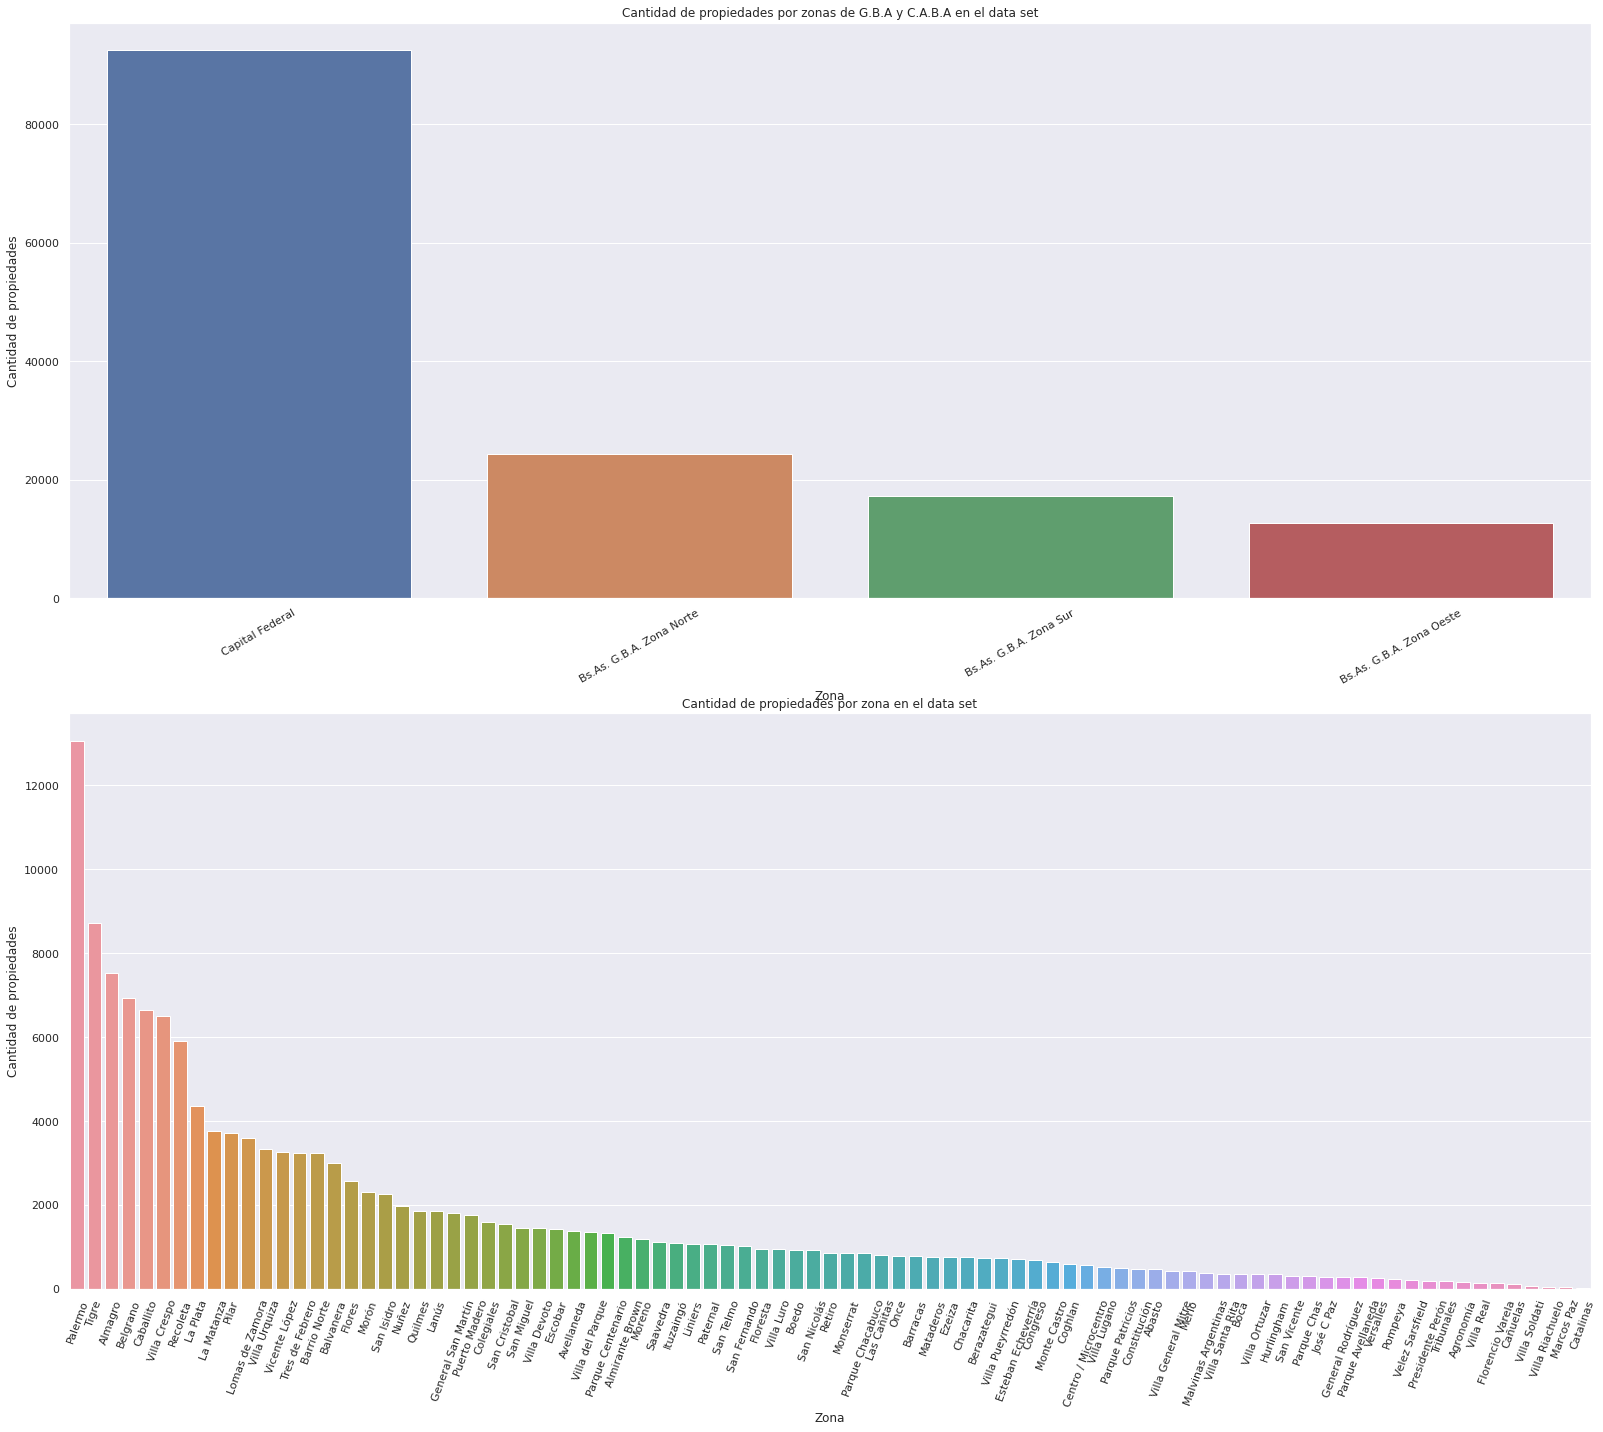

In [10]:
## Regiones de las publicaciones:
# Aca la idea es tener una noción de cual es la zona que tiene la mayor cantidad de 
# propiedades publicadas.

## Grafico en un grafico de barras ordenado de mayor a menor:
fig = plt.subplots(nrows=1, ncols=2)
sns.set(rc={'figure.figsize':(12+15,8.27+20)})     # Aca le doy el tamaño a mis gráficos. Los hagi grandes para que se vean bien las distintas zonas.
plt.tight_layout()

# Visualizo una comparativa entre CABA y GBA (por zona de GBA):

plt.subplot(2,1,1)              # Estas son zonas de G.B.A comparadas contra capital federa.
sns.countplot(x = "l2", data = data, order = data["l2"].value_counts().index)
plt.xticks(rotation = 30)       # Roto las etiquetas para que se vea.
plt.title('Cantidad de propiedades por zonas de G.B.A y C.A.B.A en el data set')
plt.xlabel('Zona')
plt.ylabel('Cantidad de propiedades')
print('')

# Ahora abro la visualización por barrios de las distintas zonas.

plt.subplot(2,1,2)
sns.countplot(x = "l3", data = data, order = data["l3"].value_counts().index)   # l3 me da la info del barrio de cada zona. 
plt.title('Cantidad de propiedades por zona en el data set')
plt.xticks(rotation = 70)       # Roto las etiquetas para que se vea.
plt.xlabel('Zona')
plt.ylabel('Cantidad de propiedades')
print('')

## NOTA: La zona de Palermo, en capital federal, tiene la mayor cantidad de propiedades.
# Tiene sentido, porque en capital federal hay una mayor densidad de propiedades verticales.
# Aca se repite el paretto, el 80% de las propiedades publicadas en el data set son de Capital federal y Zona norte del GBA.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [11]:
### Del desarrollo de los puntos 3 y 4 tenemos que:
# Las tres clases más abundantes de tipos de propiedad: 

#------------------------------------
## 1) Depto: 'Departamento'
## 2) Casa:  'Casa'
## 3) PH:    'PH'
#------------------------------------

# La región con más propiedades publicadas:

## 1) Capital federal:

# Uso masks:

data_CABA = data[(data.l2 == 'Capital Federal')] # Selecciono solo la data de l2 'Capital Federal'.

## Data final:

# Uso masks y las concateno:

data_depto = data_CABA[(data_CABA.property_type == 'Departamento')]
data_casa  = data_CABA[(data_CABA.property_type == 'Casa')]
data_PH    = data_CABA[(data_CABA.property_type == 'PH')]

data_final = pd.concat([data_depto, data_casa, data_PH], axis = 0, ignore_index = True) # Las pone una abajo de la otra axis = 0 y re asigna el numero de indice de fila con ignore_index = True

filas   = data_final.shape[0]
columnas = data_final.shape[1]

print('La data final tiene ',filas,'instancias y ',columnas, ' columnas')

## Nota: Check point Ok.
# Continuo...

La data final tiene  91485 instancias y  19  columnas


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
## NOTA:
# Voy respondiendo cada punto con su respectivo numero: 

# 1) Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
# 2) Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
# 3) Lo mismo ocurre con valores de superficie total muy chico.
# 4) Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.
# 5) El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
# 6) Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.


In [12]:

# 1) Ejecuto un describe del data set para darme una idea de la descripcion estadística que tienen las  variabe cuyas distribuciones y correlaciones voy a obtener:
# rooms	bedrooms	bathrooms	surface_total	surface_covered	

print('Descripción estadística del DataSet:')
data.describe()

## NOTA: Respuesta: Latitud y Longitud toman valores para los cuales no se pueden sacar conclusiones muy realistas. Al ser dos variables de geo localización, para poder sacar una conclusión habría que interpretarlas en el contexto
## adecuado. Una buena idea podría ser, en vez de obtener una descripción estadística, dibujar los puntos en un mapa para entender donde están ubicadas y así poder obtener alguna conclusión viendo su distribución geográfica.

## Por otro lado, rooms	bedrooms	bathrooms tienen valores muy razonables. No es necesario hacer un filtrado de los mismos.

Descripción estadística del DataSet:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [13]:
## ANTES DE HACER NADA: MUY IMPORTANTE -----> # 4) Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.
# Filtro esto primero para poder tarbajar con un dataset: "SANO"

indx_ST_ma_SC = data.surface_covered < data.surface_total  # Vector booleano con los indices True donde se cumple la condición correcta.

# Indento el vector indx_ST_ma_SC en mi data para generar data nueva con valores de surface_covered y surface_total que cumplan con esa condicion "sana":

data_n = data[indx_ST_ma_SC] # Mi nueva data son todas las intancias que cumplen con la condicion "sana"


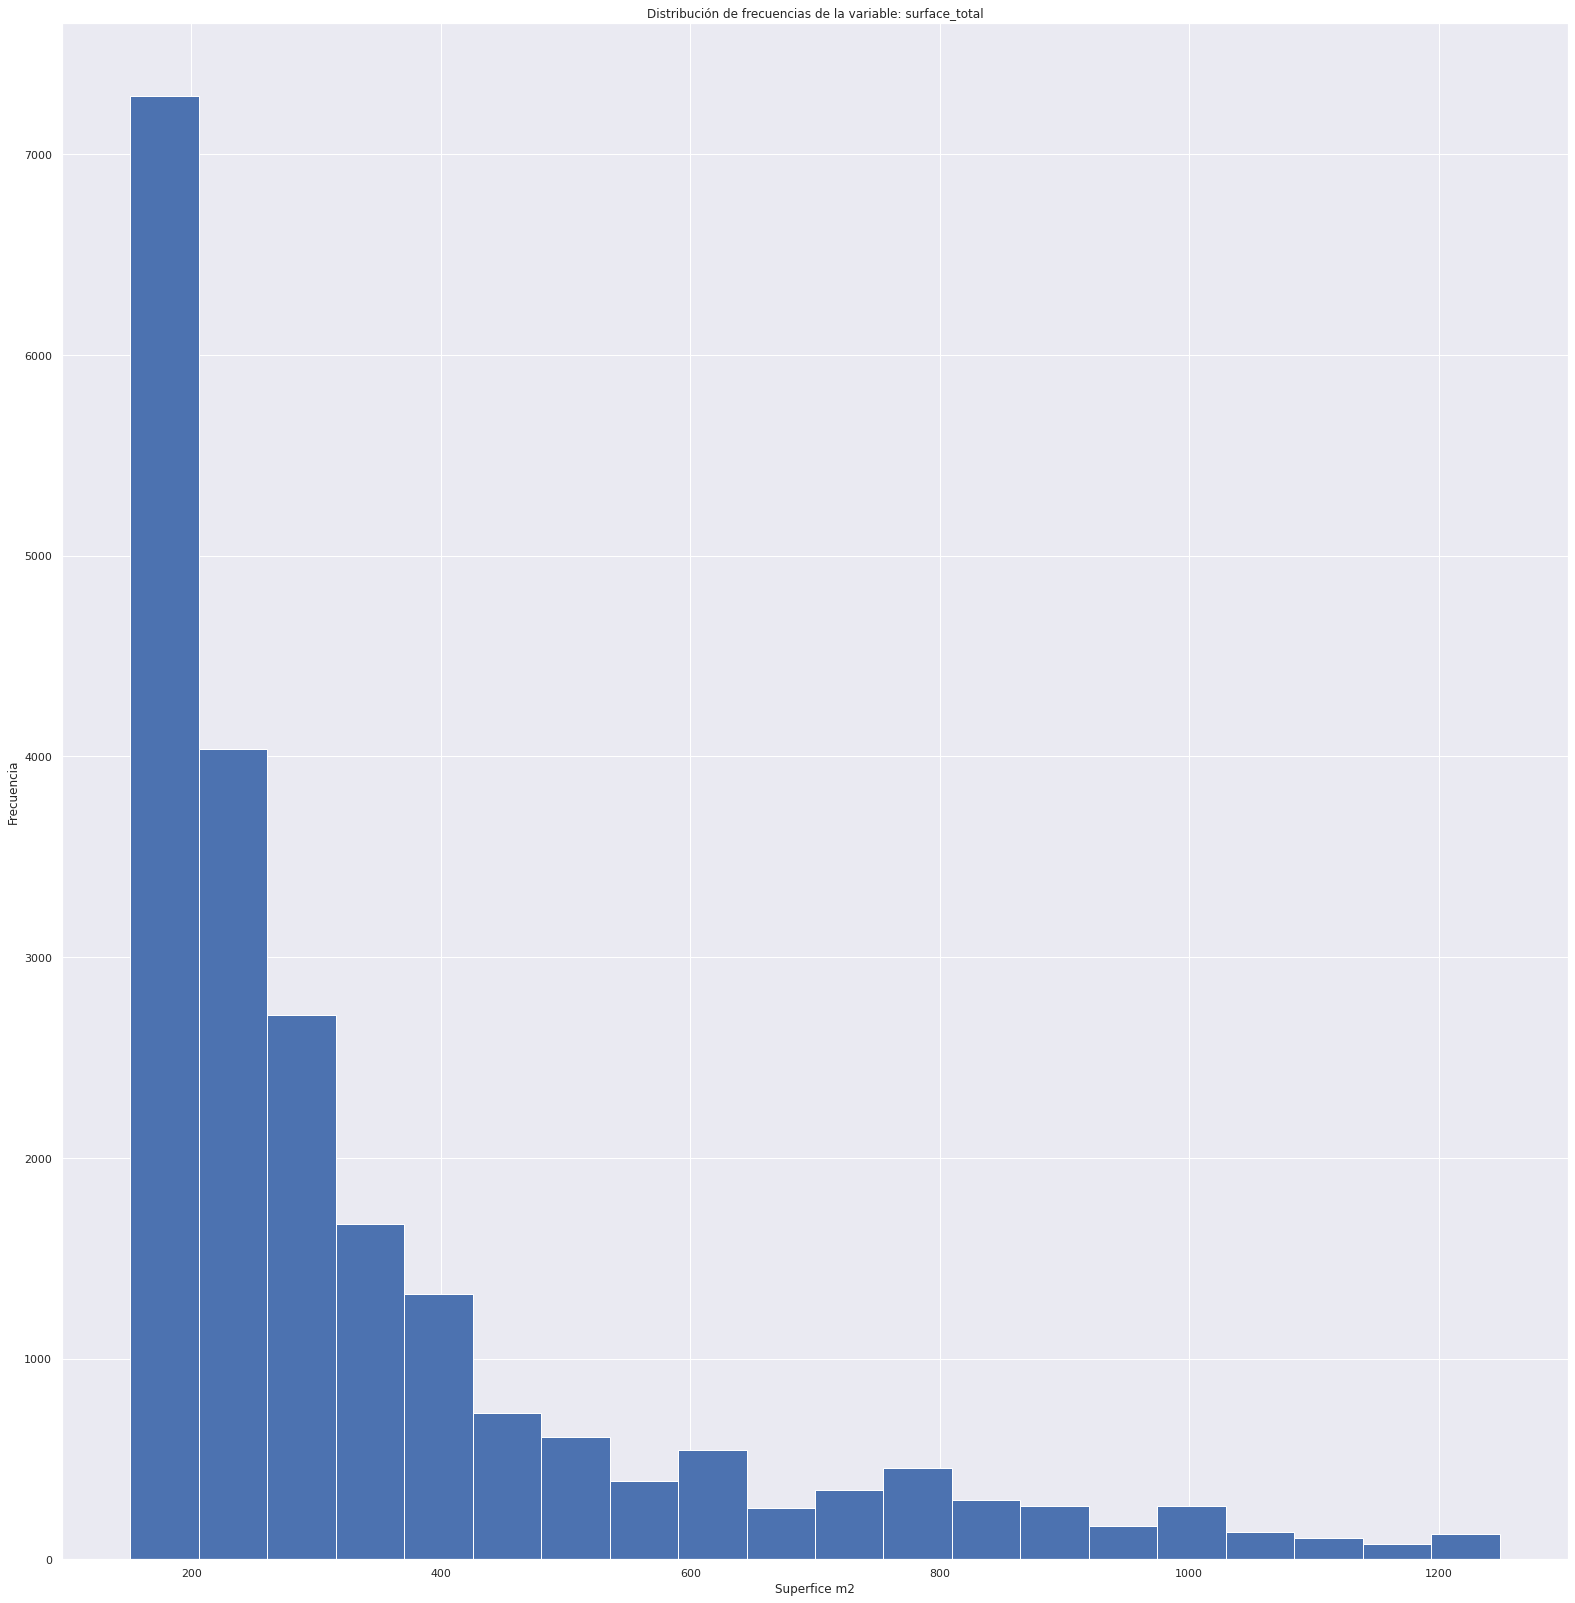

In [14]:
##  2) y 3) Hago una distribución de surface_total para explorar su forma:
# Voy probando con distintos valores de surface_total basado en lo obtenido del punto # 1) de mi data_n (data new) hasta poder visualizar una distrubución de algun tipo.

# Defino mis limites inferior y superior que voy a ir modificando:

lim_inf =  150      ## Limite inferior para cotar el rango de surface_total
lim_sup =  1250     ## Limite superior para cotar el rango de surface_total

# Filtro la data:
data1 = data_n.surface_total[(data_n.surface_total>lim_inf) & (data_n.surface_total<lim_sup)] # data1 tiene solo instancias de surface_total

plt.hist(data1,bins = 20)
plt.title('Distribución de frecuencias de la variable: surface_total')
plt.xlabel('Superfice m2')
plt.ylabel('Frecuencia')
print('')
plt.show()

## NOTA: Respuesta: En este punto, un rango razonable podría ser surface_total = [150 , 1250] m2, pero voy a seguir estudiando la distribución con boxplot.

Boxplot 1 para definir el rango de surface_total



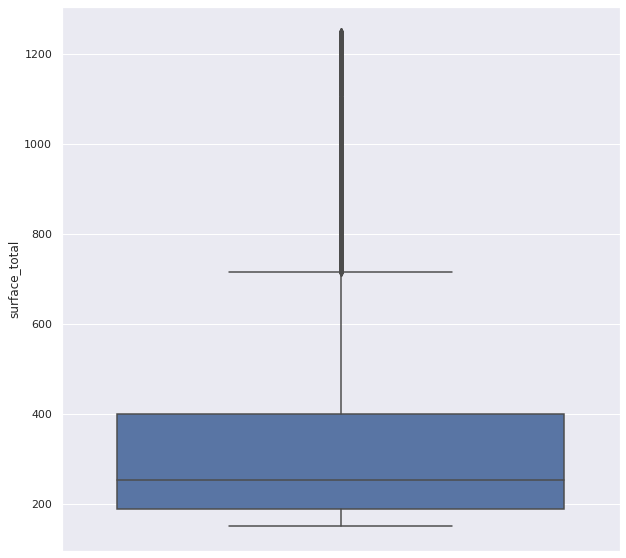

In [15]:

#  2) y 3) Analizo los outliers de (surface_total):

sns.set(rc={'figure.figsize':(10,10)})
print('Boxplot 1 para definir el rango de surface_total')
sns.boxplot(data = data_n[(data_n.surface_total>150) & (data_n.surface_total<1250)], y = "surface_total")
print('')
plt.show()

## Respuesta 1: Primer filtro: Rango razonable de surface_total: surface_total>150 & surface_total<1250. Quedan muchos outliers por arriba todavía 

Boxplot 2 para definir el rango de surface_total



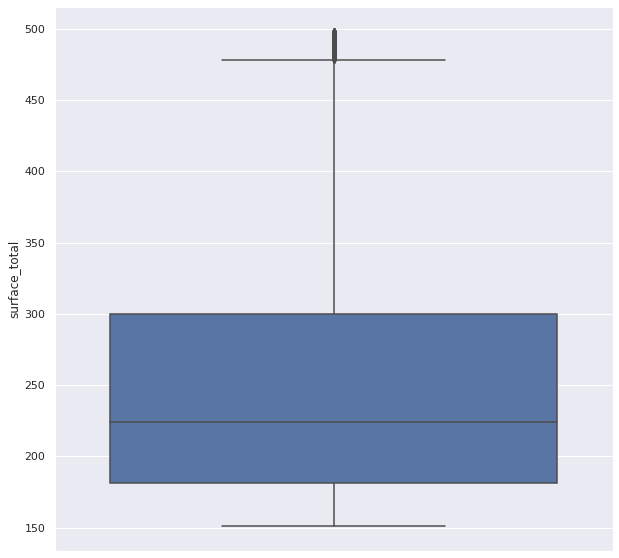

In [16]:
## 2) y 3) Acoto el rango una vez mas:

sns.set(rc={'figure.figsize':(10,10)})
print('Boxplot 2 para definir el rango de surface_total')
sns.boxplot(data = data_n[(data_n.surface_total>150) & (data_n.surface_total<500)], y = "surface_total")
print('')
plt.show()

#------------------------------------------------------------------------------------------------------------------
## Respuesta Final: Defino filtro de surface_total: data_n[(data_n.surface_total>150) & (data_n.surface_total<500)]
#------------------------------------------------------------------------------------------------------------------

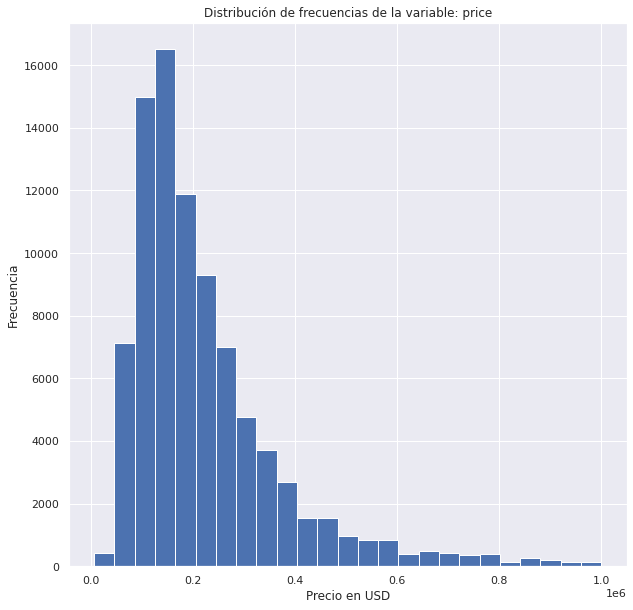

In [17]:
# 5) Filtrado de rango de precios:

# Voy probando con distintos valores de price  basado en lo obtenido del punto # 1) de mi data_n (data new) hasta poder visualizar una distrubución de algun tipo.

# Defino mis limites inferior y superior que voy a ir modificando:

lim_inf_p =  5500     ## Limite inferior para cotar el rango de surface_total
lim_sup_p =  1000000     ## Limite superior para cotar el rango de surface_total

# Filtro la data:
data2 = data_n.price[(data_n.price>lim_inf_p) & (data_n.price<lim_sup_p)] # data1 tiene solo instancias de surface_total

plt.hist(data2,bins = 25)
plt.title('Distribución de frecuencias de la variable: price')
plt.xlabel('Precio en USD')
plt.ylabel('Frecuencia')
print('')
plt.show()

## Respuesta: En este punto, un rango razonable podría ser price = [5500 , 1.000.000] USD,pero voy a seguir estudiando la distribución con boxplot.

Boxplot para definir el rango de price



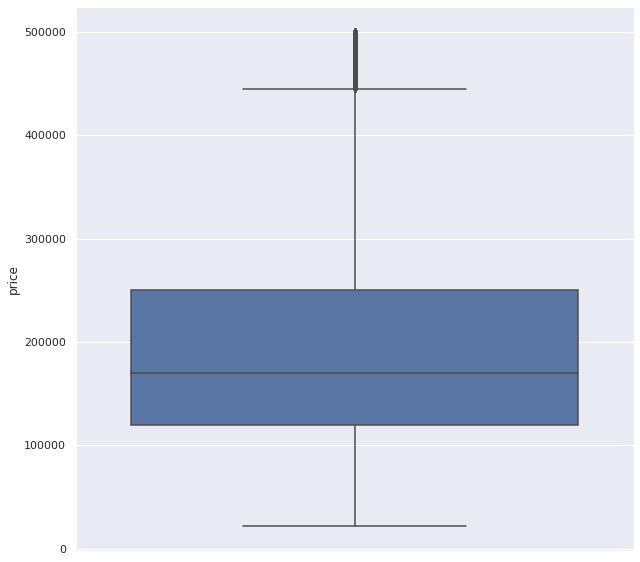

In [18]:
#  5).1 Analizo los outliers de (price): Entre 5500 y 1.000.000 para empezar
# Nota: Esta vez no voy a hacer dos instancias de boxplot: 
      # Voy probando hasta ver donde quedan la menor cantidad de outliers como sea posible.

sns.set(rc={'figure.figsize':(10,10)})
print('Boxplot para definir el rango de price')
sns.boxplot(data = data_n[(data_n.price>20000) & (data_n.price<500000)], y = "price")
print('')
plt.show()

#----------------------------------------------------------------------------------------------
## Respuesta Final: Defino filtro de price: data_n[(data_n.price>20000) & (data_n.price<500000)]
#----------------------------------------------------------------------------------------------

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


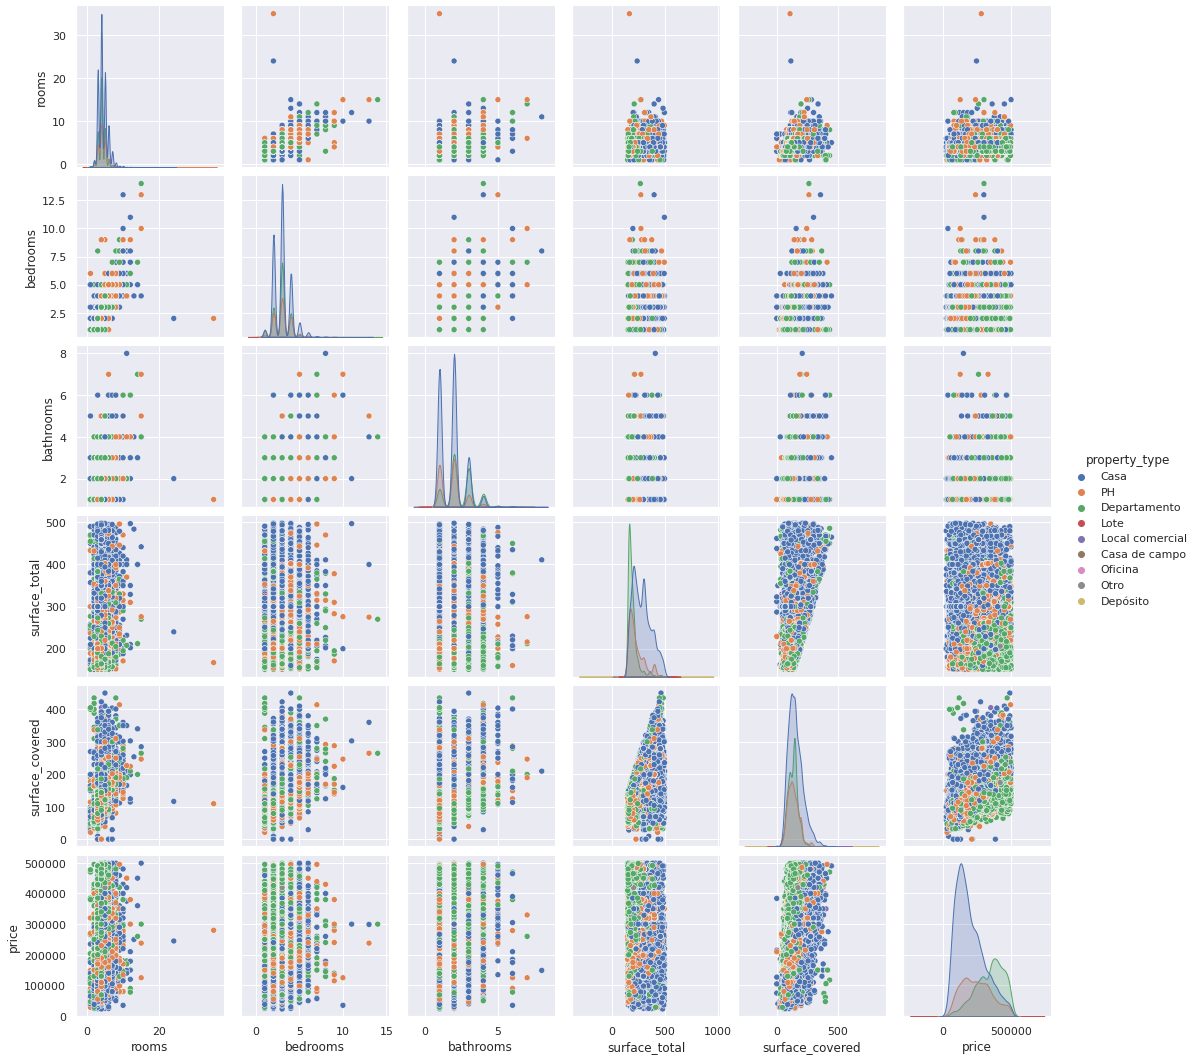

In [ ]:
# 7) Hago los filtros finales de la data_n (data curada por absurdo de propiedades no pueden tener surface_covered mayor a surface_total).
    # Los hago devuelta revisando los pasos anteriores para no cometer errores:

#------------------------------------------------------------------------------------------------------------------
## Respuesta Final: Defino filtro de surface_total: data_n[(data_n.surface_total>150) & (data_n.surface_total<500)]
#------------------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------
## Respuesta Final: Defino filtro de price: data_n[(data_n.price>20000) & (data_n.price<500000)]
#----------------------------------------------------------------------------------------------

# Filtrado de data:

data_sup = data_n[(data_n.surface_total>150) & (data_n.surface_total<500)] # Filtro la data curada data_n por filtro de superficioes.
data_f = data_sup[(data_sup.price>20000) & (data_sup.price<500000)]        # Filtro la nueva data filtrada por superficies, pero ahora filtrada por precios.

## Correlaciones:
# La idea es visualziar con un pair plot. Si no veo mucho, o se me dificulta la visualización, puedo hacer un heat map. 

cols = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price','property_type'] # Selecciono las columnas que quiero
cols2 = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']
data_pp = data_f[cols]
data_pp_2 = data_f[cols2]

# A ) Hago un pair plot: Por tipo de propiedad.
sns.pairplot(data_pp, hue = 'property_type')
plt.show()

print('')
#---------------------RESPUESTAS------------------------:
#Los datos se ven muy limitados por los cortes de data que hago.
#En lineas generales el precio correlaciona de forma clara con surface_total y surface_covered.
#Por otro lado, el rango de variación del precio con surface total para casa es mas amplio que para el resto de las propiedades. Esto tiene sentido, porque el 
#tamaño de las casas es mucho mas variable que el resto. En otras palabras: Existen casas de tamaños muy grandes y muy chicos (comparables con PHs y departamentos.) 

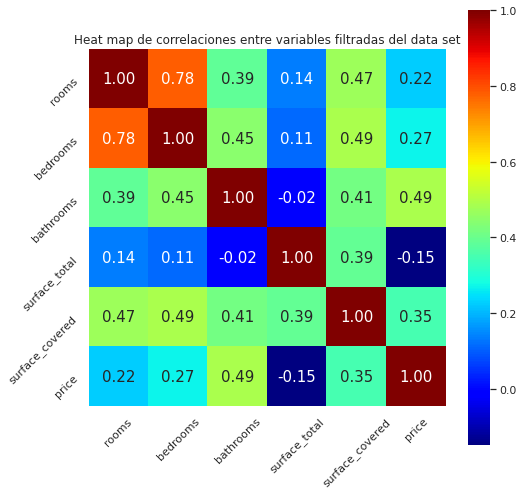

In [ ]:
## B ) Hago HEAT MAP:
# En un intento de mejorar la visualización de las correlaciones, hago un heat map con color JET:

corr = data_pp_2.corr()   # Le saco la columna 'property_type' para que me quede mejor el heat map.
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_pp_2.columns, 
           yticklabels= data_pp_2.columns,
           cmap= 'jet')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Heat map de correlaciones entre variables filtradas del data set')
plt.show()

##----------------- Respuesta final----------------------: 
# Veo una buena correlacion entre:
# a) El numero de bathrooms y price: 0.49 ----->TIENE SENTIDO porque se valua mucho mas la cantidad de baños en una propiedad.
# b) El numero de surface_covered y bedrooms: 0.41 ---> TIENE MUCHO SENTIDO. A mayor superficie cubierta, uno esperaría tener una maypr cantidad de habitaciones construidas.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


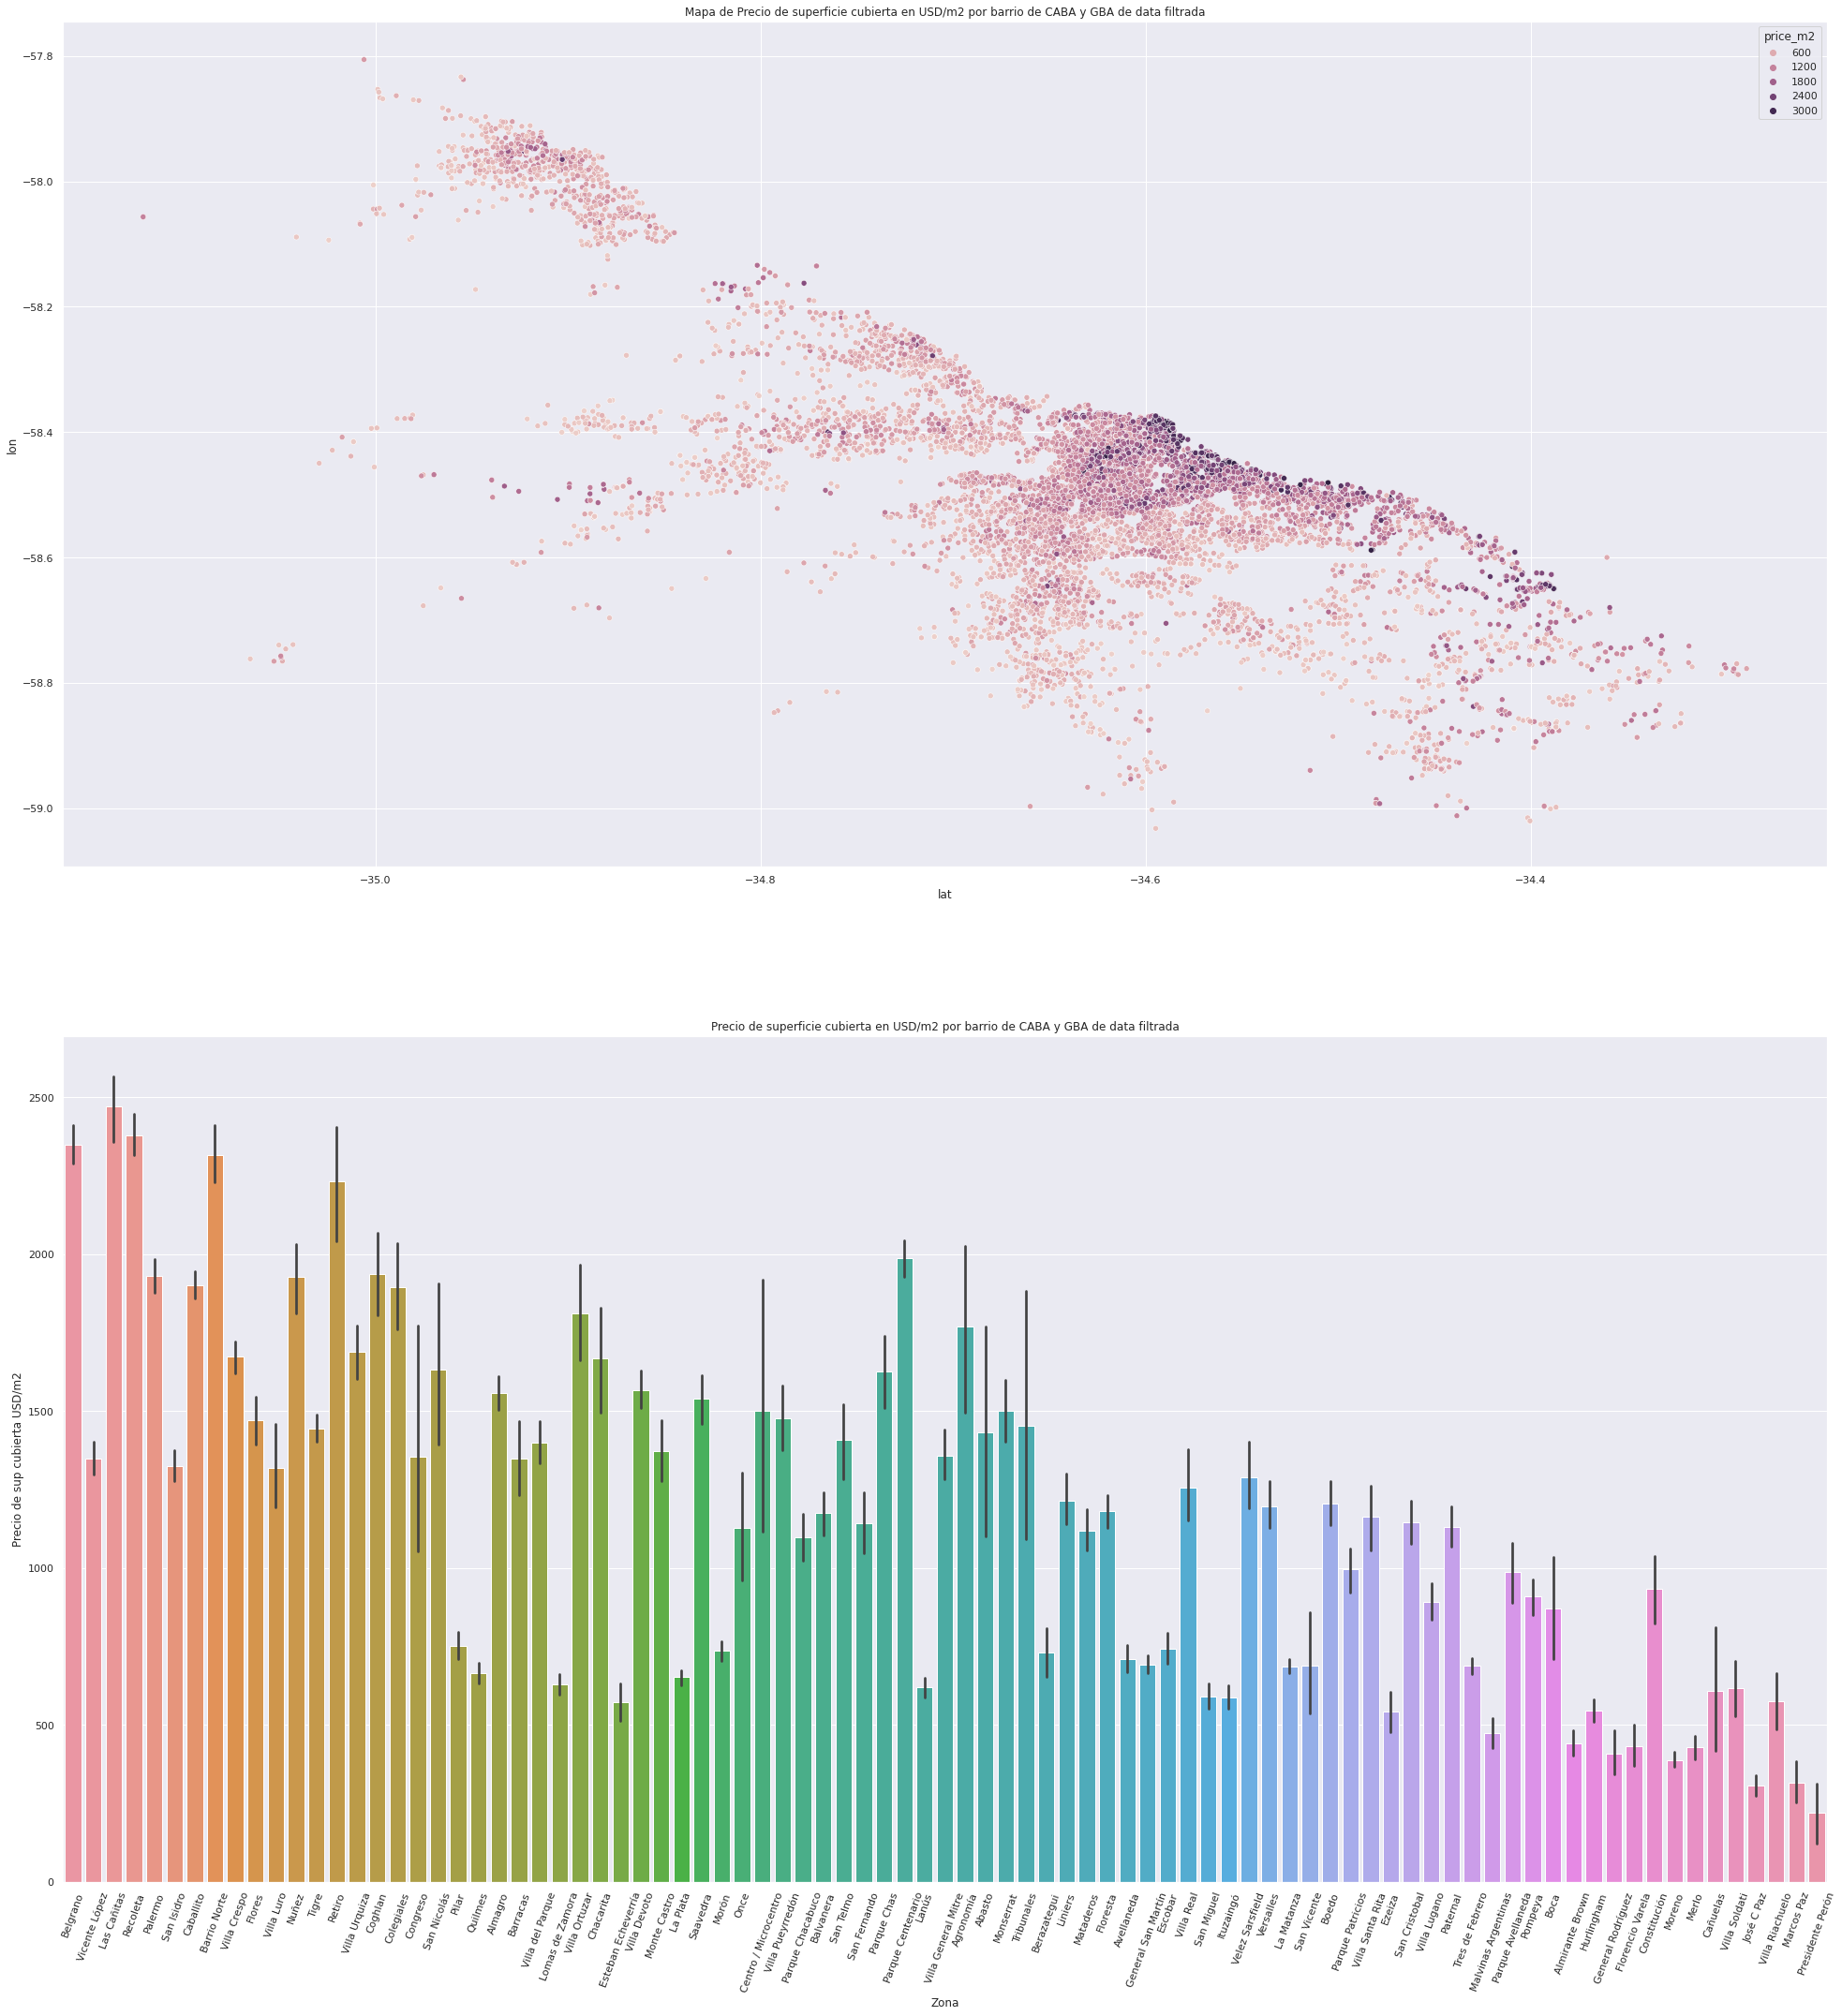

In [ ]:
## Pregunta propuesta: ¿Que barrio de Buenos Aires tiene el precio/m2 (precio por metro cuadrado de superficie cubierta) mas elevado?
#                      Voy a tratar de graficarlo en un mapa con latitud y longitud. {lat, lon}

# Filtrado de data: Uso los filtros que hice antes devuleta para poder correrlo varias veces y acercarme a una respuesta fial: 

data_sup = data_n[(data_n.surface_total>150) & (data_n.surface_total<500)] # Filtro la data curada data_n por filtro de superficies.
data_f = data_sup[(data_sup.price>20000) & (data_sup.price<500000)]        # Filtro la nueva data filtrada por superficies, pero ahora filtrada por precios.

## Elijo las columnas:

cols =  ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price','lat','lon','property_type','l3'] # Selecciono las columnas que quiero

## Data para resolver el desafío:
data_desaf = data_f[cols] 

data_desaf['price_m2'] = data_desaf.price/data_desaf.surface_total

data_bar = data_desaf[['l3','price_m2']] # Tomo las columnas para re ordenar de mayor a menor por 'price_m2'
data_usdm2 = data_bar.sort_values(by = 'price_m2',ascending=False)

#data_desaf.head() # Muestro un head para verificar que la seleccion de columnas es coherente.

## Hago dos graficos:
# 1) El primero es un grafico de logalización por 'price/m2' para determinar, de la data filtrada, cual es la zona con el valor de 'price/m2' mas elevado.
# 2) El segundo es un grafico que me ordena de mayor a menor, por barrio, el que tiene el 'price/m2' mas elevado.

fig = plt.subplots(nrows=1, ncols=2)
sns.set(rc={'figure.figsize':(12+15,8.27+20)})     # Aca le doy el tamaño a mis gráficos. Los hagi grandes para que se vean bien las distintas zonas.
plt.tight_layout()

## 1)
plt.subplot(2,1,1)
plt.title('Mapa de Precio de superficie cubierta en USD/m2 por barrio de CABA y GBA de data filtrada')
sns.scatterplot(data_desaf.lat, data_desaf.lon, hue = data_desaf['price_m2'])

## 2)
plt.subplot(2,1,2)
sns.barplot(x = 'l3', y = data_usdm2['price_m2'], data = data_usdm2)
plt.title('Precio de superficie cubierta en USD/m2 por barrio de CABA y GBA de data filtrada')
plt.xticks(rotation = 70)       # Roto las etiquetas para que se vea.
plt.xlabel('Zona')
plt.ylabel('Precio de sup cubierta USD/m2')
print('')

##-----------------RESPUESTA----------------:
# De la data que filtre, la zona que mayor price_m2 tiene es Las cañitas en belgrano. (ES REPRESENTATIVO SOLO PARA LAS PROPIEDADES QUE TIENEN surface_total>150 & surface_total<500 Y  price>20000 & price<500000  )
# NOTA IMPORTANTE: El grafico de latitud y longitud no me quedo con la forma de capital federal
# porque restringí mucho el filtrado de la data. 


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [23]:
##Checkpoint:
#------------------------------------------------------------------
## Nota mega importante: Repito codigo que ya hice más arriba
# No comento todo al detalle porue repito mucho de lo que ya hice.
#------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargo el data set:
data  = pd.read_csv('/content/drive/MyDrive/Curso Acamica/Sprint 1/DS_Proyecto_01_Datos_Properati.csv')

## 1) Capital federal:

# Uso masks:

data_CABA = data[(data.l2 == 'Capital Federal')]

## Data final:

# Uso masks y las concateno:

data_depto = data_CABA[(data_CABA.property_type == 'Departamento')]
data_casa  = data_CABA[(data_CABA.property_type == 'Casa')]
data_PH    = data_CABA[(data_CABA.property_type == 'PH')]

data_f = pd.concat([data_depto, data_casa, data_PH], axis = 0, ignore_index = True) # Las pone una abajo de la otra axis = 0 y re asigna el numero de indice de fila con ignore_index = True

data_f.head()

## 2) Selecciono aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.

data_2 = data_f[(data_f.surface_total >= 15) & (data_f.surface_total <= 1000)]

## 3) Selecciono aquellas propiedades cuya precio es menor 4000000 dólares.

data_3 =  data_2[(data_2.price <= 4000000 )]

## 4) Selecciono las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.

data_4 = data_3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
data_4_bis = data_3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']] # Tiene lo mismo que la anterior pero la columna de porperty_type.

## 5) Descarto aquellas instacias con valores faltante

data_5 = data_4.dropna()
data_4_bis_clean = data_4_bis.dropna()

filas   = data_5.shape[0]
columnas = data_5.shape[1]

print('Check Point')
print('')
print('La data final tiene ',filas,'instancias y ',columnas, ' columnas')

#data_4_bis.head()
data_5.head()

## Nota: Check point Ok.

Check Point

La data final tiene  81019 instancias y  6  columnas


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,1.0,68.0,59.0,149000.0
2,2.0,1.0,1.0,50.0,44.0,115000.0
3,2.0,1.0,1.0,31.0,31.0,75000.0
4,1.0,1.0,1.0,22.0,22.0,48000.0


# Respuestas para la re-correción: Selección de Métricas.

g - Modelo de ML: Métrica de evaluación.
PARA COMPLETAR: Se utiliza la métrica RMSE tanto para los modelos de KNN como para el de Árboles, pero falta realizar la justificación de la elección.

## -  Elección de la métrica para evaluar los resultados de los modelos:
- Elijo métrica RMSE porque mi objetivo es predecir el precio de las propiedades de la forma mas exacta posible en USD. Desde un punto de vista de negocio y de cara a la atencion y servicio de tasación que se le brindará a nuevos clientes, mientras más se acerque al estimación de precio de la pripiedad al precio real, se estará brindadno un mejor servicio inmobiliario.
- Adicionalmente tomo el R2 para evaluar la capacidad de predicción del modelo. R2 toma valores entre -oo y 1. En el caso de ser negativo, significaría que el modelo es peor que predecir la media del precio. No voy a utilizar este parámetro como métrica de optimización de modelos.

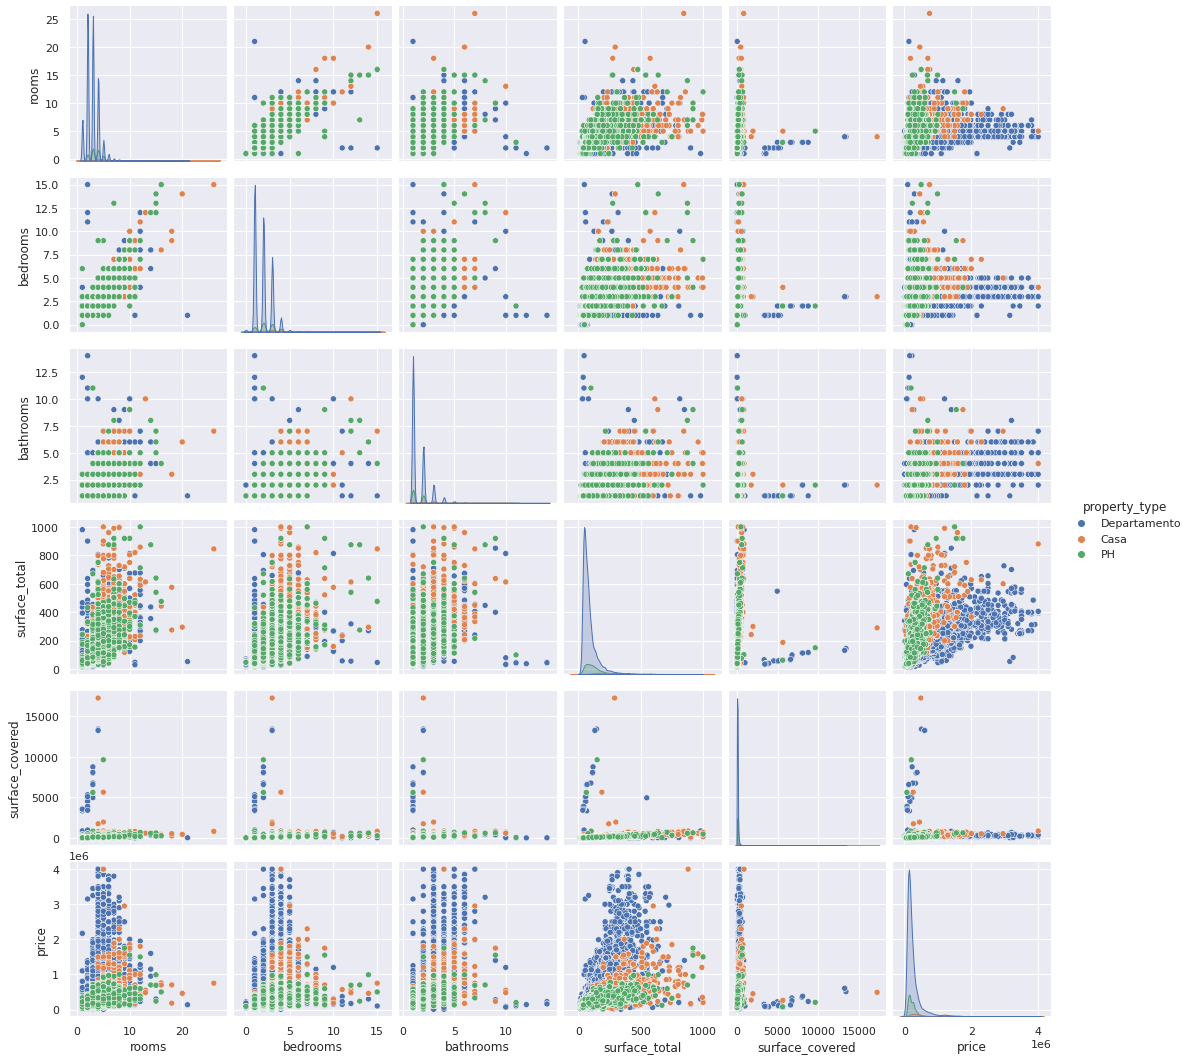

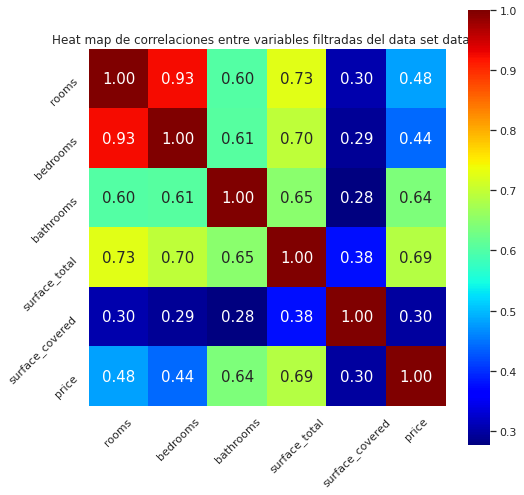

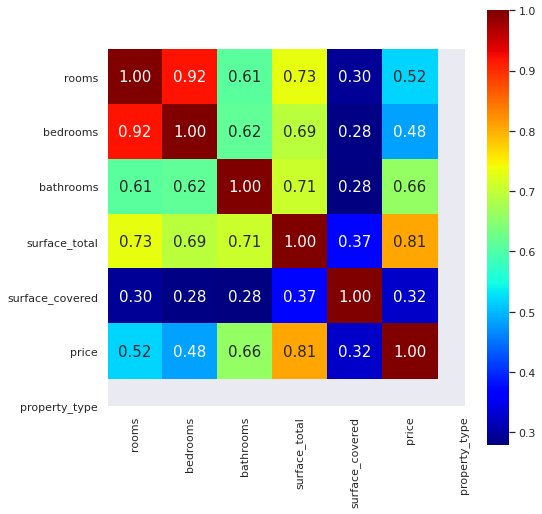

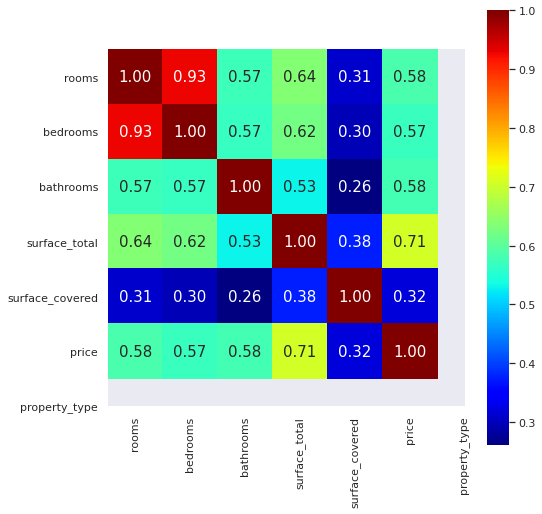

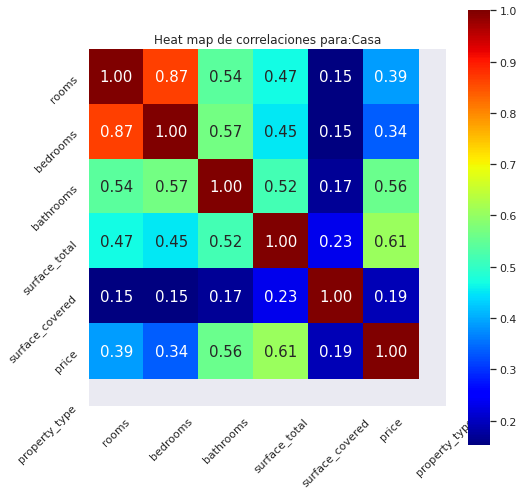

In [ ]:
## Machine Learning: Consigna y calculos previos:

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión - 
#para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal). Para ello, no debes olvidarte de:

#Elegir una métrica apropiada para evaluar los resultados de los modelos.
#Seleccionar las variables predictoras (X) y la variable a predecir (y).
#Realizar un Train/Test split de los datos.
#Generar un modelo benchmark y evaluarlo.
#Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
#Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
#Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
#Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
#Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: 
#¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##------Pequeñisimo análisis de correlaciones para elegir las variables predictoras----:
# Data genereal: Sin diferenciar por tipo de propiedad.

# A ) Hago un pair plot de la data filtrada con hue en property_type para ver que variable correlaciona mejor con price y poder tomar la mas correcta para cada tipo de propiedad:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.pairplot(data_4_bis_clean, hue = 'property_type' )
plt.show()

# B) Hago un heat map para estar seguro de la data global:

corr = data_5.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_5.columns, 
           yticklabels= data_5.columns,
           cmap= 'jet')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Heat map de correlaciones entre variables filtradas del data set data_5')
plt.show()

## Nota: Correlacionan lindo por ahora, para toda la data:
# VARIBALES PREDICTORAS: 'bathrooms' y 'surface_total'

# Price con surface_total ----> Uso esta finalmente en el modelo 1D
# Price con bathrooms.    ----> Agrego esta para armar un modelo 2D para reducir el error.

#------------------------------------------------------------------------------------------------------------

## Podría hacer un heat map para cada categoria: Depto, PH o casa como bis.

## B.bis) Hago un heat map para estar seguro de las correlaciones con las distintas variables y price, en la data particular:
# Depto, PH o Casa.

propiedad = ['Departamento','PH','Casa']

for prop in propiedad:
  data_h = data_4_bis_clean[(data_4_bis_clean.property_type == prop)]
  corr = data_h.corr()
  plt.figure(figsize=(8,8))
  sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_h.columns, 
           yticklabels= data_h.columns,
           cmap= 'jet')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Heat map de correlaciones para:' + prop)
plt.show()


## Nota: Correlacionan lindo por ahora, para toda la data:

# Para Departamentos: Surface total y bathrooms.
# Para PH: Surface total y rooms.
# Para Casa: Surface total y bathrooms.

In [25]:
# Importo librerías: Son muchas... Nose si voy a terminar usando todas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

[2633.92796567] 12409.574819029396
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 215887.60959756168
Raíz del error cuadrático medio en Test: 220864.03704029295
R2 en Train: 0.4704816154527989
R2 en Test: 0.4727694873309014


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


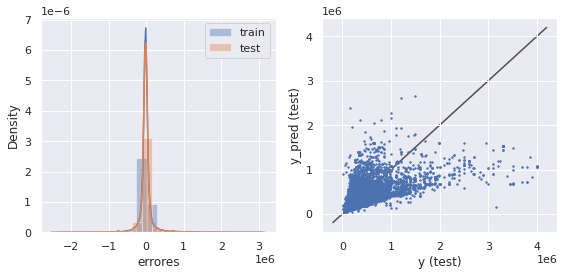

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 202129.14154215436
Raíz del error cuadrático medio en Test: 211140.36361039453
R2 en Train: 0.5358231565493989
R2 en Test: 0.5181708679562549


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


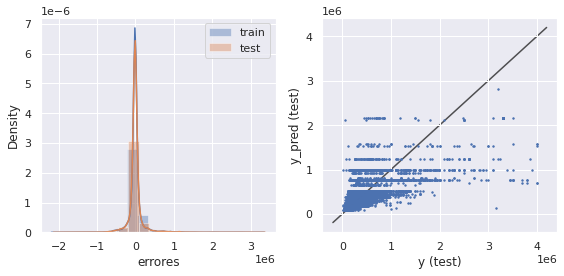

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 191729.0332772235
Raíz del error cuadrático medio en Test: 201378.48811310527
R2 en Train: 0.5823606868662814
R2 en Test: 0.5616947464090991


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


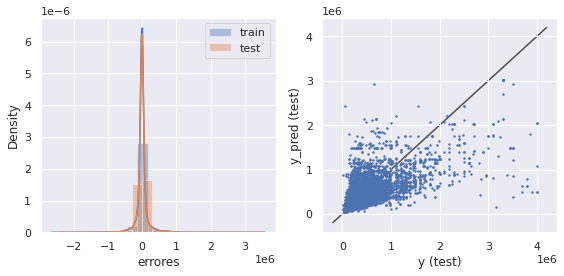

In [ ]:
##----------Desarrollo Modelos ML 1D Regression----------:

# CON TODA LA DATA DEL CHECKPOINT: 81019 instancias y  6  columnas: data_5 
#Predecir precio de las propiedades: El precio es una variable "Continua", no categorica.
#-----------------------------------------------------------------------------------------------------------------
## Voy a terminar usando las variables 'surface_total'  del heat map anterior para predecir el price
#----------------------------------------------------------------------------------------------------------------

## A) Datos:

data =  data_5   # La data que filtre en el punto anterior:

## B) Modelo de machine learning: price es variable CONTINUA. (Uso 'surface_total' como variables predictoras.)
## estas nos van a  dejar un modelo (función price) en 3D: Relacion lineal con dos atributos.
## B1) KNN y B2) Decision Tree:

## Elijo mi set de train y test:

from sklearn.model_selection import train_test_split

X = np.array(data.surface_total)
y = np.array(data.price)

## Obtengo los datos TRAIN y TEST: 

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#------------
## Benchmark:
#------------

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

#-----------
## B.1) KNN:
#-----------

knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train, y_train)


#--------------------
## B.2) DecisionTree:
#--------------------

tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

##-------------------------------
# Calculos de errores y graficos:
##-------------------------------


modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    ## Estas son las metricas que voy a usar a lo largo del desarrollo de todos los 
    #  modelos de ML que voy a ir haciendo para tratar de llegar a un óptimo:

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    R2_train = r2_score(y_train, y_train_pred)                      # R2
    R2_test = r2_score(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'R2 en Train: {R2_train}')
    print(f'R2 en Test: {R2_test}')

    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Respuestas para la re-correción: Optimización de Hiperparámetros.

k - Modelo de ML: Optimización de hiperparámetros.
PARA COMPLETAR: Falta realizar la optimización de los modelos (Modifica el número de vecinos y la profundidad del árbol).
* Se puede buscar en la bibliografía, en la notebook DS - Toolbox 13_ Evaluación.ipynb se debe ver el ejemplo de la evaluación del modelo de KNeighborsClassifier, en dónde se varían el número de vecinos en cada modelo, pero se debe aplicar a los modelos de regresión realizados.

## - Teniendo en cuenta el elveado valor de RMSE obtenido de la primer corrida y comparando de los modelos contra el benchmark, busco reducirlo optimizando hiper parámetros de estos (TREE y KNN). 

## - En este punto sigo usando, las variables que extraje con mejor correlación para realizar el modelo:
- Estas se pueden visualizar en data_5 siendo: 
  - "rooms"	- "bedrooms" - "bathrooms" - "surface_total" - "surface_covered" - 	"price".

- Voy a seguir usando estas, planteando los modelos anteriores, para hacer la otpmización de hiper-parámetros: N°Depths para el modelo de Decision Tree Regressor y N°neighbours para el modelo KNN Regressor.
- Voy a graficar la evolución de:
 - RMSE vs N°depths para el Tree.
 - RMSE vs N°neighbours para el KNN.

- El objetivo final, en línea con el problema de negocio a solucionar, es reducir alminimo el RMSE para poder dar el precio mas cercano a la "realidad" como sea posible. 

# Nota para el corrector:
Prefiero hacerlo de esta forma, porque me simplifica a mi el análisis. Entiendo que para un algoritmo de modelo de regresión de python, la cantidad de variables que tiene el data set de properati es perfectamente manejable, pero en este punto estoy buscando ser coherente con el análisis exploratorio previo que hice sobre los datos despues del Checkpoint.


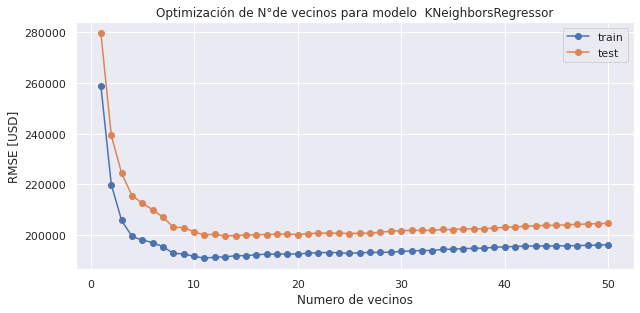

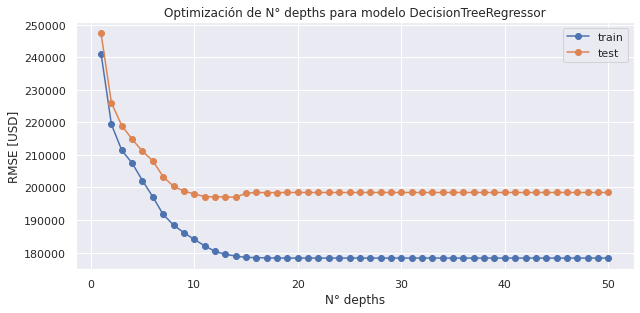

In [35]:
#----------------------------------
## OPTIMIZACIÓN DE HIPERPARÁMETROS:
#----------------------------------

#--------
## Datos:
#--------

data =  data_5   # La data que filtre en el punto anterior. data_5

# Vuelvo a importar las librerías (ya se que no es buena práctica).

from sklearn.model_selection import train_test_split

X = np.array(data.surface_total)
y = np.array(data.price)

## Obtengo los datos TRAIN y TEST: 

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#-----------
## B.1) KNN:
#-----------

# Definimos las listas vacias para los valores de RMSE deseados:

lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar:

max_vecinos = 50
k_vecinos = list(range(1,max_vecinos+1)) 

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train )
    lista_rmse_test.append(rmse_test)

plt.subplot(2,1,1)
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Numero de vecinos')
plt.ylabel('RMSE [USD]')
plt.title('Optimización de N°de vecinos para modelo  KNeighborsRegressor')
plt.show()

#--------------------
## B.2) DecisionTree:
#--------------------

# Definimos las listas vacias para los valores de RMSE deseados:

lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar:

max_depths = 50
n_depths = list(range(1,max_depths+1)) 

# Generamos un loop sobre los distintos valores de k 
for k in n_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf =  DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train )
    lista_rmse_test.append(rmse_test)


plt.subplot(2,1,2)
plt.plot(n_depths,lista_rmse_train,'o-',label='train' )
plt.plot(n_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('N° depths')
plt.ylabel('RMSE [USD]')
plt.title('Optimización de N° depths para modelo DecisionTreeRegressor')
plt.show()

# Conclusion de la optimización de Hiper parámetros:

## B.1) KNN: 
- Utilizando el data set data_5 que elegí en las secciones anteriores, siendo conciente que usa pocas variables, el número de k vecinos que minimiza el RMSE (obtenido graficamente) es: 13 vecinos para TEST (USD 200.000) y 11 vecinos para TRAIN (USD menor a 100.000).


## B.2) DecisionTree:
- Nuevamente, utilziando el data set data_5 que elegí en las secciones anteriores, siendo conciente que usa pocas variables, el número de n depths que minimiza el RMSE (obtenido graficamente) es: 14 profundidades para TEST (menor a USD 200.000) y 20 para TRAIN (el RMSE parece estabilizarse a partir de esa profundidad en un valor menor a USD 180.000. Puede haber riesgo de overfitting).

## NOTA:
- En ambos casos el RMSE sigue siendo alto. No es muy útil a nivel negocio tener un error de USD 200.000 en la estimación del precio de una propiedad, pero esto puede explicarse por usar poca cantidad de variables del data set. 
- En las proximas corridas voy a ir agregando variables para ver como reacciona el RMSE.


In [33]:
data_4_bis_clean.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
2,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
3,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
4,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento


[896.82962827] 104546.67618927656
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 82405.10891598456
Raíz del error cuadrático medio en Test: 81959.57734831072
R2 en Train: 0.497623848939475
R2 en Test: 0.49808032077444087
Raíz del error cuadrático medio en Train: 82405.10891598456
Raíz del error cuadrático medio en Test: 81959.57734831072


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


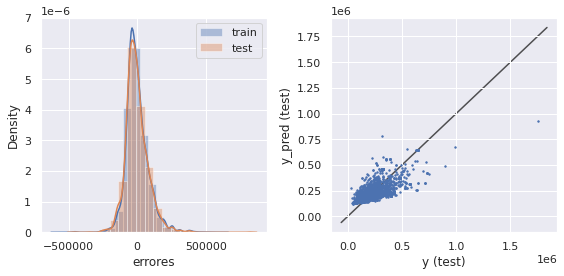

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 73535.9547664495
Raíz del error cuadrático medio en Test: 74051.69541977279
R2 en Train: 0.5999445328328801
R2 en Test: 0.5902633466771803
Raíz del error cuadrático medio en Train: 73535.9547664495
Raíz del error cuadrático medio en Test: 74051.69541977279


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


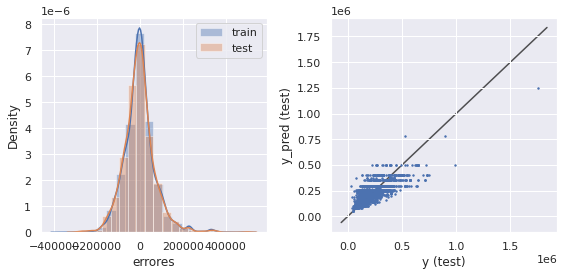

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 68333.43557402126
Raíz del error cuadrático medio en Test: 72784.1067079475
R2 en Train: 0.6545483661501686
R2 en Test: 0.6041707204402567
Raíz del error cuadrático medio en Train: 68333.43557402126
Raíz del error cuadrático medio en Test: 72784.1067079475


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


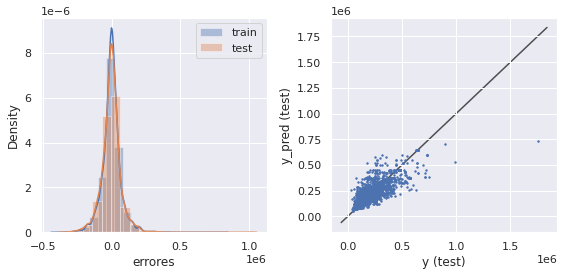

In [ ]:
# Trato de empezar a bajar el error RMSE:

##----------Desarrollo Modelos ML 1D Regression----------:

# CON TODA LA DATA DEL CHECKPOINT: 81019 instancias y  7  columnas: data_4_bis_clean. Agrego 'propoerty_type' para tratar de bajar el error eligiendo por tipo de propiedad.

#Predecir precio de las propiedades: El precio es una variable "Continua", no categorica.
#-----------------------------------------------------------------------------------------------------------------
## Voy a terminar usando las variables 'surface_total'  del heat map anterior para predecir el price
#----------------------------------------------------------------------------------------------------------------

## A) Datos:

# Uso esta para poder filtrar por tipo de propiedad, para reducir el RMSE que da usar toda la data separada por porperty type (data_4_bis_clean)

tipo_propiedad = 'PH'
#tipo_propiedad = 'Departamento'
#tipo_propiedad = 'Casa'

data = data_4_bis_clean[(data_4_bis_clean.property_type == tipo_propiedad)] 

## B) Modelo de machine learning: price es variable CONTINUA. (Uso 'surface_total' como variables predictoras.)
## estas nos van a  dejar un modelo (función price) en 3D: Relacion lineal con dos atributos.
## B1) KNN y B2) Decision Tree:

## Elijo mi set de train y test:

from sklearn.model_selection import train_test_split

X = np.array(data.surface_total)
y = np.array(data.price)

## Obtengo los datos TRAIN y TEST: 

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#------------
## Benchmark:
#------------

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

#-----------
## B.1) KNN:
#-----------

knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train, y_train)


#--------------------
## B.2) DecisionTree:
#--------------------

tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

##-------------------------------
# Calculos de errores y graficos:
##-------------------------------

from sklearn.metrics import mean_squared_error
import seaborn as sns

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'R2 en Train: {R2_train}')
    print(f'R2 en Test: {R2_test}')


    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## - En esta estapa se puede decir que separando la data (con las variables reducidas que elegí anteriormente) por tipo de propiedad esto es: corriendo los dos modelos con PH, Departamento o Casa, se logra reducir considerablemente el RMSE.
## - Esto se explica porque cuando se "filtra" por tipo de propiedad se está alimentando al modelo con valores de variables que tienen la misma "genesis". En otras palabras, uno no puede comparar el precio de una casa con el de un PH o el de un departamento. El precio de una casa es varios ordenes de magnitúd mayor que el de un PH. Entrenar el modelo con datos de las 3 propiedades juntos y esperar que el RMSE en la predicción de precio sea chico, es el equivalente a trabajar con valores outliers. Entonces, filtrando la data de esta forma se logra tener mas consistencia en los datos y se logra entrenar al modelo para predecir los precios de cada propiedad por separado.
## - El proximo paso podría ser correr una optimización de hiper parámetros para cada modelo separando en PH , Departamento y Casa. Lo hago al final del script, con el modelo con menor RMSE que obtuve antes de las conclusiones para tratar de darle la ultima refinada. 


[97976.18587951   297.55121577] -56292.60967343248
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 256281.75206178197
Raíz del error cuadrático medio en Test: 261660.55526316309
R2 en Train: 0.25379015151751794
R2 en Test: 0.2600079711567801
Raíz del error cuadrático medio en Train: 256281.75206178197
Raíz del error cuadrático medio en Test: 261660.55526316309


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


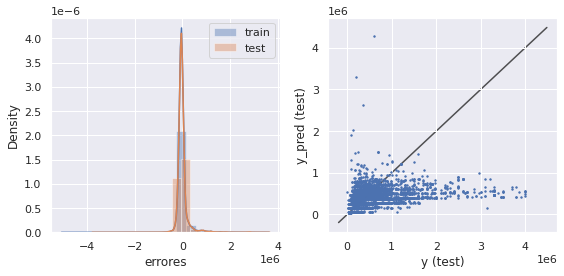

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 195235.37682785114
Raíz del error cuadrático medio en Test: 201268.611666261
R2 en Train: 0.5669454182220051
R2 en Test: 0.562172913525544
Raíz del error cuadrático medio en Train: 195235.37682785114
Raíz del error cuadrático medio en Test: 201268.611666261


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


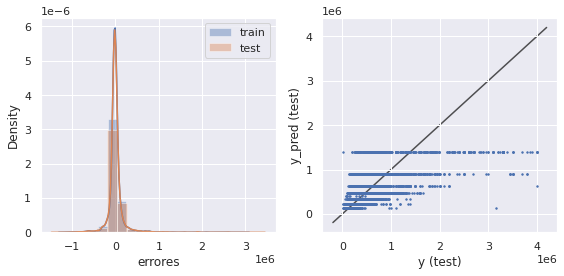

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 160081.4914560275
Raíz del error cuadrático medio en Test: 173730.96606932516
R2 en Train: 0.7088559951760803
R2 en Test: 0.673784198787983
Raíz del error cuadrático medio en Train: 160081.4914560275
Raíz del error cuadrático medio en Test: 173730.96606932516


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


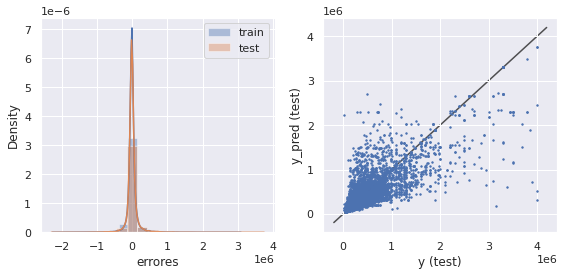

In [ ]:
## ¿Podre seguir bajando el error agregando una variable mas?
# Vamos a ver...: Hago lo mismo que antes.

# CON TODA LA DATA DEL CHECKPOINT: 81019 instancias y  6  columnas: data_5 

##----------Desarrollo Modelos ML 2D Regression----------:
#Predecir precio de las propiedades: El precio es una variable "Continua", no categorica.
#-----------------------------------------------------------------------------------------------------------------
## Voy a terminar usando las variables 'bathrooms' y 'surface_total' del heat map anterior para predecir el price
#----------------------------------------------------------------------------------------------------------------

## A) Datos:

data =  data_5   # La data que filtre en el punto anterior:

data.head()

## B) Modelo de machine learning: price es variable CONTINUA. (Uso 'bathrooms' y 'surface_total' como variables predictoras.)
## estas nos van a  dejar un modelo (función price) en 3D: Relacion lineal con dos atributos.
## B1) KNN y B2) Decision Tree:

## Elijo mi set de train y test:

from sklearn.model_selection import train_test_split

X = np.vstack((data.rooms,data.surface_covered)).T
y = np.array(data.price)

## Obtengo los datos TRAIN y TEST: 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#------------
## Benchmark:
#------------

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

#-----------
## B.1) KNN:
#-----------

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


#--------------------
## B.2) DecisionTree:
#--------------------

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

##-------------------------------
# Calculos de errores y graficos:
##-------------------------------

from sklearn.metrics import mean_squared_error
import seaborn as sns

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'R2 en Train: {R2_train}')
    print(f'R2 en Test: {R2_test}')


    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

[41872.34980581   208.45951841] 46173.4673273793
Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 92210.75016817807
Raíz del error cuadrático medio en Test: 95887.67316847344
R2 en Train: 0.3709519083429159
R2 en Test: 0.3129942631853836
Raíz del error cuadrático medio en Train: 92210.75016817807
Raíz del error cuadrático medio en Test: 95887.67316847344


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


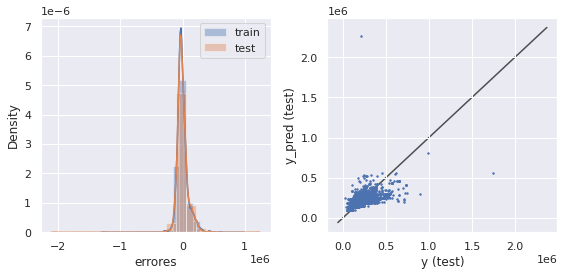

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 73567.42866627815
Raíz del error cuadrático medio en Test: 74679.88980230482
R2 en Train: 0.5996020065048355
R2 en Test: 0.5832821148684824
Raíz del error cuadrático medio en Train: 73567.42866627815
Raíz del error cuadrático medio en Test: 74679.88980230482


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


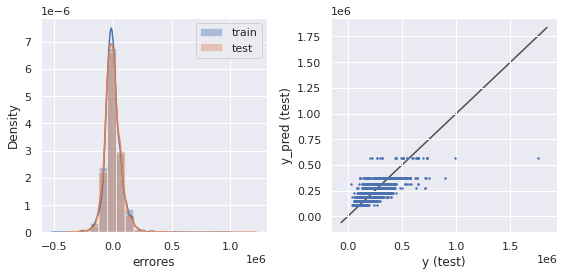

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 61311.22404145416
Raíz del error cuadrático medio en Test: 70275.31556910841
R2 en Train: 0.7219001772333656
R2 en Test: 0.6309880653345596
Raíz del error cuadrático medio en Train: 61311.22404145416
Raíz del error cuadrático medio en Test: 70275.31556910841


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


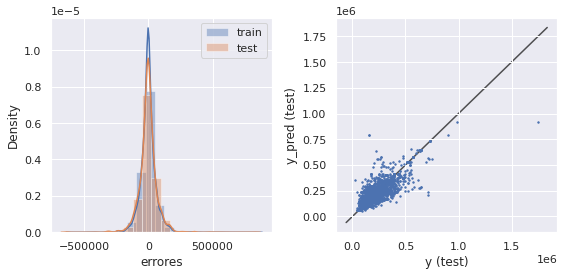

In [ ]:
# Trato de bajar el error RMSE:

##----------Desarrollo Modelos ML 1D Regression----------:

# CON TODA LA DATA DEL CHECKPOINT: 81019 instancias y  7  columnas: data_4_bis_clean. Agrego 'propoerty_type' para tratar de bajar el error.

##----------Desarrollo Modelos ML 2D Regression----------:
#Predecir precio de las propiedades: El precio es una variable "Continua", no categorica.
#-----------------------------------------------------------------------------------------------------------------
## Voy a terminar usando las variables 'bathrooms' y 'surface_total' del heat map anterior para predecir el price
#----------------------------------------------------------------------------------------------------------------

## A) Datos:

# Uso esta para poder filtrar por tipo de propiedad, para reducir el RMSE que da usar toda la data separada por porperty type (data_4_bis_clean)

tipo_propiedad = 'PH'
#tipo_propiedad = 'Departamento'
#tipo_propiedad = 'Casa'

data = data_4_bis_clean[(data_4_bis_clean.property_type == tipo_propiedad)] 

## B) Modelo de machine learning: price es variable CONTINUA. (Uso 'bathrooms' y 'surface_total' como variables predictoras.)
## estas nos van a  dejar un modelo (función price) en 3D: Relacion lineal con dos atributos.
## B1) KNN y B2) Decision Tree:

## Elijo mi set de train y test:

from sklearn.model_selection import train_test_split

X = np.vstack((data.rooms,data.surface_covered)).T
y = np.array(data.price)

## Obtengo los datos TRAIN y TEST: 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#------------
## Benchmark:
#------------

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

#-----------
## B.1) KNN:
#-----------

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


#--------------------
## B.2) DecisionTree:
#--------------------

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

##-------------------------------
# Calculos de errores y graficos:
##-------------------------------

from sklearn.metrics import mean_squared_error
import seaborn as sns

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'R2 en Train: {R2_train}')
    print(f'R2 en Test: {R2_test}')


    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

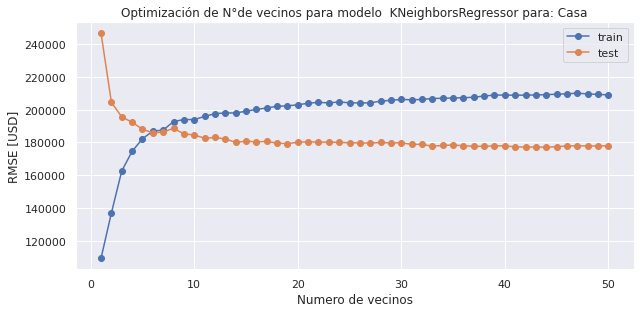

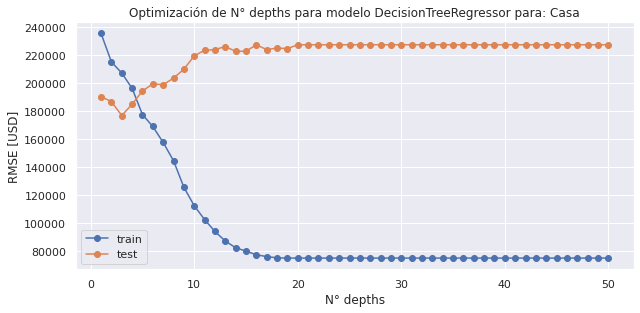

In [45]:
#---------------------------------------------------------------------------
## OPTIMIZACIÓN DE HIPERPARÁMETROS PARA AMBOS MODELOS POR TIPO DE PROPIEDAD:
#---------------------------------------------------------------------------

#--------
## Datos:
#--------

## A) Datos:

# Uso esta para poder filtrar por tipo de propiedad, para reducir el RMSE que da usar toda la data separada por porperty type (data_4_bis_clean)

#tipo_propiedad = 'PH'
#ipo_propiedad = 'Departamento'
tipo_propiedad = 'Casa'

data = data_4_bis_clean[(data_4_bis_clean.property_type == tipo_propiedad)] 

## B) Modelo de machine learning: price es variable CONTINUA. (Uso 'bathrooms' y 'surface_total' como variables predictoras.)
## estas nos van a  dejar un modelo (función price) en 3D: Relacion lineal con dos atributos.
## B1) KNN y B2) Decision Tree:

## Elijo mi set de train y test:

from sklearn.model_selection import train_test_split

X = np.vstack((data.rooms,data.surface_covered)).T
y = np.array(data.price)

## Obtengo los datos TRAIN y TEST: 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#-----------
## B.1) KNN:
#-----------

# Definimos las listas vacias para los valores de RMSE deseados:

lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar:

max_vecinos = 50
k_vecinos = list(range(1,max_vecinos+1)) 

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train )
    lista_rmse_test.append(rmse_test)

plt.subplot(2,1,1)
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Numero de vecinos')
plt.ylabel('RMSE [USD]')
plt.title('Optimización de N°de vecinos para modelo  KNeighborsRegressor para: ' + tipo_propiedad)
plt.show()

#--------------------
## B.2) DecisionTree:
#--------------------

# Definimos las listas vacias para los valores de RMSE deseados:

lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar:

max_depths = 50
n_depths = list(range(1,max_depths+1)) 

# Generamos un loop sobre los distintos valores de k 
for k in n_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf =  DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train )
    lista_rmse_test.append(rmse_test)


plt.subplot(2,1,2)
plt.plot(n_depths,lista_rmse_train,'o-',label='train' )
plt.plot(n_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('N° depths')
plt.ylabel('RMSE [USD]')
plt.title('Optimización de N° depths para modelo DecisionTreeRegressor para: ' + tipo_propiedad)
plt.show()

# Conclusiones: 

## Selección del mejor modelo (con la cantidad de variables reducidas - "rooms" - "bedrooms" - "bathrooms" - "surface_total" - "surface_covered" - "price" + "property_type"):

- Si quisieramos estimar el precio sin diferenciar por tipo de propiedad, el mejor modelo a utilizar (el que logra el RMSE mas bajo) es el Tree Cassifier Regressor con 14 profundidades (RMSE < USD 200.000) que es mejor que el modelo de regresión lineal tomado como Benchmark. Este error sigue siendo muy elevado si se considera que desde un punto de vista de negocio, se quiere dar el precio mas exacto que se pueda.
- Si en cambio quisieramos estimar el precio por **tipo de propiedad**, este serían las mejores combinaciones y modelo según que propiedad se busque tasar:

 - **PH:**  Modelo de KNN con 12 vecinos (RMSE < USD 70.000). Si se elige un valor a la derecha (mayor a 12 vecinos) se corre riesgo de tener over fitting porque, se ve que al incrementar una unidad el numero de vecinos, el RMSE no disminuye.
 - **Departamento:** Modelo TREE con 21 depths (RMSE < USD 160.000). De ejegirse un valor a la derecha (mayor a 21) ocurre lo mismo que en el punto anterior.
 - **Casa**:  Modelo TREE con 3 depths (RMSE < USD 180.000). De ejegirse un valor a la derecha (mayor a 3) ocurre lo mismo que en el punto anterior.

## Preguntas para mejorar: Respondo entre líneas:

- ¿Qué mejorarías? 
 - Haría un mejor filtrado de outliers usando algún criterio estadístico como el Rango Inter Quartílico o la regla 3 Sigma.
- ¿Qué información no estás usando que podría ayudar al modelo?
 - No estoy usando la info de la zona de donde son las propiedades. Visto la gran influencia que tiene esto en elprecio, podría usarlo para hacer un mejor modelo. Estas son: "lat" -	"lon" -	"l1" - "l2"	- "l3".
- ¿Qué información puede estar demás o repetida?
 - Las variables "surface_total" con "surface_covered" puede resultar reiterativa por estar correlacionadas fuertemente entre sí. Podría adoptar solo una, y sumar otras variables que no estén correlacionadas entre ellas para darle mas generalidad a los modelos.